Установка библиотек

In [1]:
!pip install audio-extract

  Obtaining dependency information for audio-extract from https://files.pythonhosted.org/packages/b2/85/5433110bf0eb71151782694098b818b4f0b26fd2992623881694fd8a6a09/audio_extract-0.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for imageio-ffmpeg==0.4.8 from https://files.pythonhosted.org/packages/7f/1d/9d9bb0beef06704cb3acb7cab8673b451d4528ee6cc9b231d1284aa1ed75/imageio_ffmpeg-0.4.8-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for mutagen==1.46.0 from https://files.pythonhosted.org/packages/03/ee/114d7016d2e34f341e212fefb5e7bd87785077ebcfff0ad23a497c70eea1/mutagen-1.46.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/22.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/22.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/22.6 MB 435.7 kB/s eta 0:00:52
   ---------------------------------------- 0.1/22.6 MB 544.7 kB/s eta 0:00:42
   ---------------------------------------- 0.1/22.6 MB 8


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install librosa


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Extract_audio извлекает аудио из видеоролика и сохраняет в указанный путь
Так как наша нейронная сеть будет иметь дело не только с UGC (user generate content), но и с проф. контентом его деление должно происходить заранее например указателем папки UGC or ProfC


In [3]:
from audio_extract import extract_audio
extract_audio(
    input_path=r"C:\Users\skorp\Documents\hakaton videos\TestVideo1.mp4",
    output_path=r"C:\Users\skorp\Documents\hakaton videos\output\test.mp3"
)

Success : audio file has been saved to "C:\Users\skorp\Documents\hakaton videos\output\test.mp3".


In [4]:
import librosa

In [5]:
import os # библиотека для работы с файлами
#file = r"C:\Users\skorp\Documents\hakaton videos\output\test.mp3"
file = r"test.mp3"
signal, sr = librosa.load(file, sr = 22050) # загружаем файл

In [6]:
print(signal.shape, sr) 
#первый - это цифровое представление нашего аудиосигнала (в виде временного ряда),
#второй - соответствующая частота дискретизации по которой он был извлечен

(103635,) 22050


In [7]:
print(signal) #Посмотрим на наш аудиосигнал

[ 0.00825459  0.05105204 -0.00158115 ... -0.00141087 -0.00164391
  0.00059326]


Представим аудиосигналл в виде звуковой волны

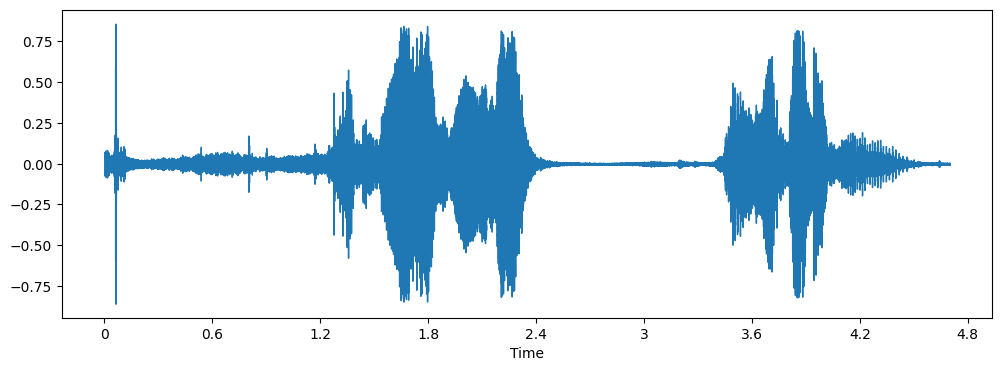

In [8]:
import matplotlib.pyplot as plt
import librosa.display as ld
plt.figure(figsize=(12,4))
ld.waveshow(signal, sr=sr)

с помощью функции IPyhon.display() получим плеер в блокноте, где можно воспроизвести аудиофайл.

In [14]:
import IPython
display(IPython.display.Audio(signal, rate = sr))

In [9]:
import numpy as np

График спектр сигнала

Text(0, 0.5, 'Amplitude')

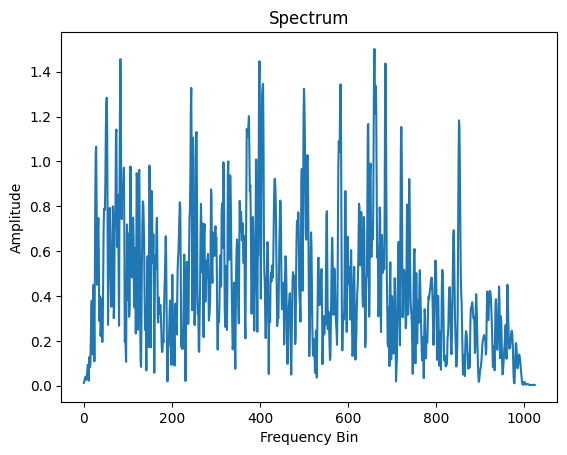

In [10]:
n_fft = 2048
ft = np.abs(librosa.stft(signal[:n_fft], hop_length = n_fft+1))
plt.plot(ft)
plt.title('Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')

спектрограмма аудиосигнала

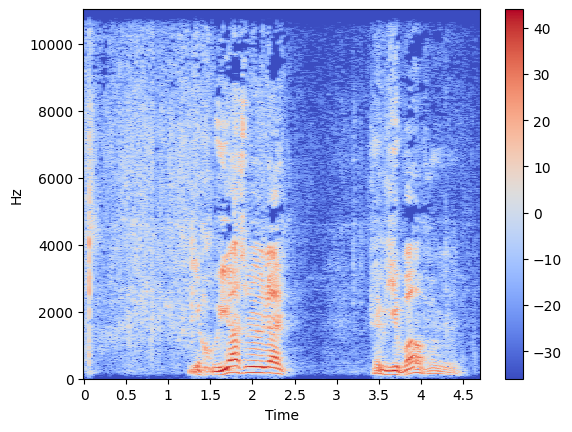

In [11]:
X = librosa.stft(signal)
s = librosa.amplitude_to_db(abs(X))
ld.specshow(s, sr=sr, x_axis = 'time', y_axis='linear')
plt.colorbar()

Мел-спектрограмма представляет собой спектрограмму, преобразованную в мел-шкалу.

In [12]:
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc = 40, hop_length=512)
mfccs

array([[-1.9111278e+02, -1.6550867e+02, -7.9609344e+01, ...,
        -3.5552771e+02, -3.8839252e+02, -4.1969479e+02],
       [-4.8334875e+00,  3.6297935e-01, -2.5425726e-01, ...,
         5.8835716e+01,  3.5491348e+01,  1.9388821e+01],
       [-1.9856514e+01, -2.1970362e+01, -3.8569481e+01, ...,
        -1.9975471e+01, -1.1534039e+01, -1.5366491e+01],
       ...,
       [ 1.9768012e+00,  2.0762753e+00,  5.7765880e+00, ...,
         3.1157970e-01,  3.3984165e+00,  6.2631040e+00],
       [-5.1653337e-01,  2.1523459e+00, -2.7416816e+00, ...,
        -1.1603692e+00,  3.3788598e-01,  4.0666885e+00],
       [-2.1248112e+00, -2.6386182e+00,  2.2636306e+00, ...,
         2.7132618e+00,  7.3185253e-01,  6.2630014e+00]], dtype=float32)

Спектральный центроид (Spectral Centroid) является хорошим показателем яркости звука, широко используется в качестве автоматической меры музыкального тембра.

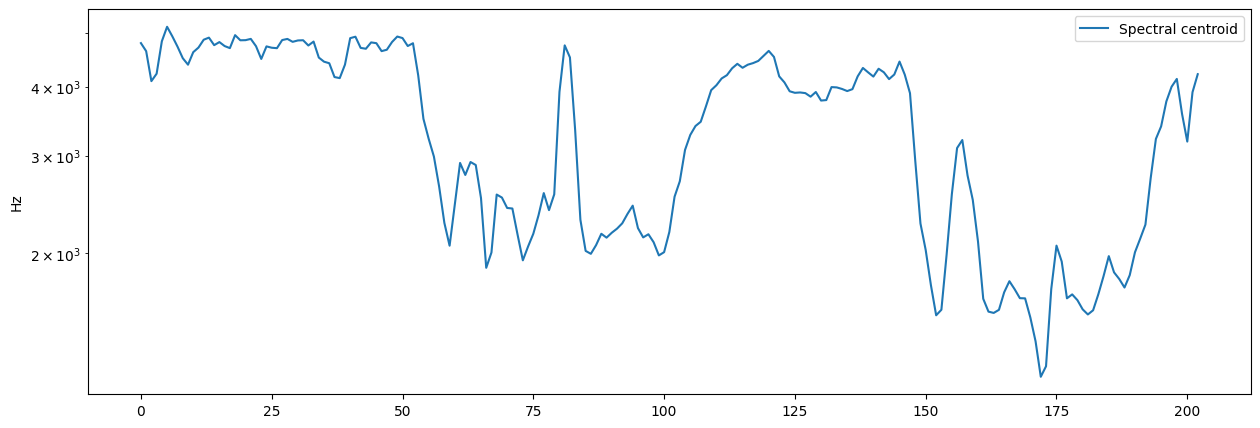

In [13]:
cent = librosa.feature.spectral_centroid(y=signal, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.legend()

Спектральный спад  (Spectral Rolloff) представляет собой частоту, ниже которой лежит определенный процент от общей спектральной энергии.

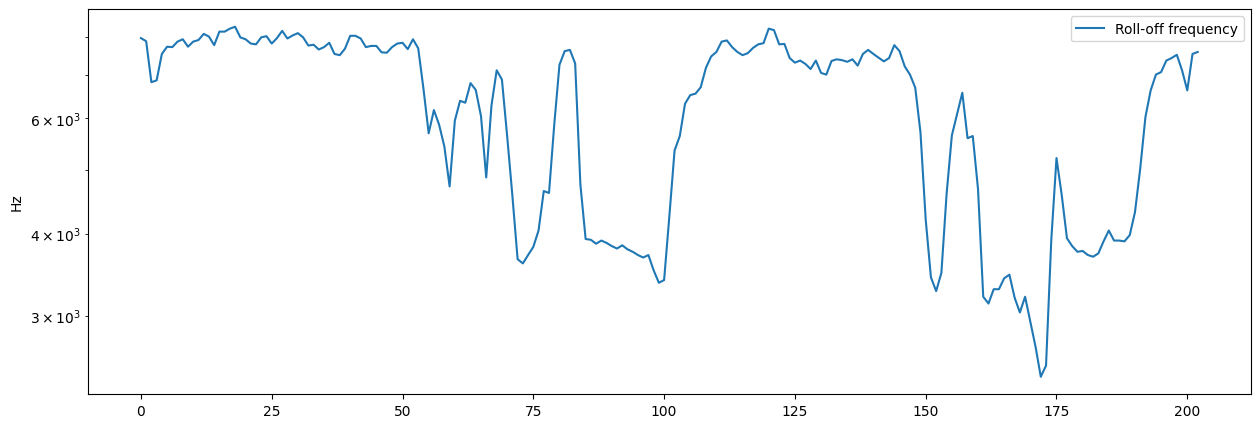

In [14]:
rolloff=librosa.feature.spectral_rolloff(y=signal, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.legend()

Скорость пересечения нуля (Zero crossing Rate) является частотой изменения знака сигнала, то есть частота, с которой сигнал меняется с положительного на отрицательный и обратно.

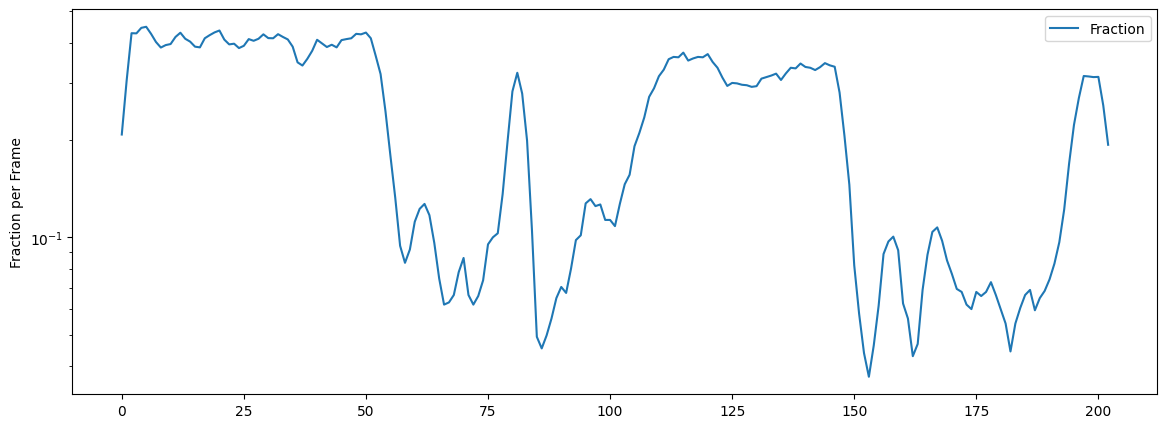

In [15]:
zrate=librosa.feature.zero_crossing_rate(signal)
plt.figure(figsize=(14,5))
plt.semilogy(zrate.T, label='Fraction')
plt.ylabel('Fraction per Frame')
plt.legend()

стандартные отклонения мел кепстральных коэффициентов

In [36]:
mfcc_mean = np.mean(librosa.feature.mfcc(y=signal, sr=sr), axis=1)
mfcc_std = np.std(librosa.feature.mfcc(y=signal, sr=sr), axis=1)

средние значения и стандартные отклонения спектрального центроида

In [37]:
cent_mean = np.mean(cent)
cent_std = np.std(cent)

средние значения и стандартные отклонения спектрального спада

In [38]:
roloff_mean = np.mean(rolloff)
croloff_std = np.std(rolloff)
print(roloff_mean, croloff_std)

4300.960096939341 2124.059013138084


In [19]:
import librosa
import os
import matplotlib.pyplot as plt
import librosa.display as ld
import numpy as np
class StatisticsOfAudio:
    def __init__(self, audio):
        self.signal, self.sr = librosa.load(audio, sr = 22050)
    def get_audio_signal(self):
        print("Аудиосигнал")
        plt.figure(figsize=(12,4))
        ld.waveshow(self.signal, sr=self.sr)
    def get_graph_spectrum(self):
        n_fft = 2048
        ft = np.abs(librosa.stft(self.signal[:n_fft], hop_length = n_fft+1))
        plt.plot(ft)
        plt.title('Spectrum')
        plt.xlabel('Frequency Bin')
        plt.ylabel('Amplitude')
    def get_spectrogramma(self):
        X = librosa.stft(self.signal)
        s = librosa.amplitude_to_db(abs(X))
        ld.specshow(s, sr=self.sr, x_axis = 'time', y_axis='linear')
        plt.colorbar()
    def get_spectral_centroid(self):
        cent = librosa.feature.spectral_centroid(y=self.signal, sr=self.sr)
        plt.figure(figsize=(15,5))
        plt.semilogy(cent.T, label='Spectral centroid')
        plt.ylabel('Hz')
        plt.legend()
    def get_spectral_rolloff(self):
        rolloff=librosa.feature.spectral_rolloff(y=self.signal, sr=self.sr)
        plt.figure(figsize=(15,5))
        plt.semilogy(rolloff.T, label='Roll-off frequency')
        plt.ylabel('Hz')
        plt.legend()
    def get_fraction_per_frame(self):
        zrate=librosa.feature.zero_crossing_rate(self.signal)
        plt.figure(figsize=(14,5))
        plt.semilogy(zrate.T, label='Fraction')
        plt.ylabel('Fraction per Frame')
        plt.legend()

In [20]:
csoa = StatisticsOfAudio("test.mp3")

График спектр сигнала


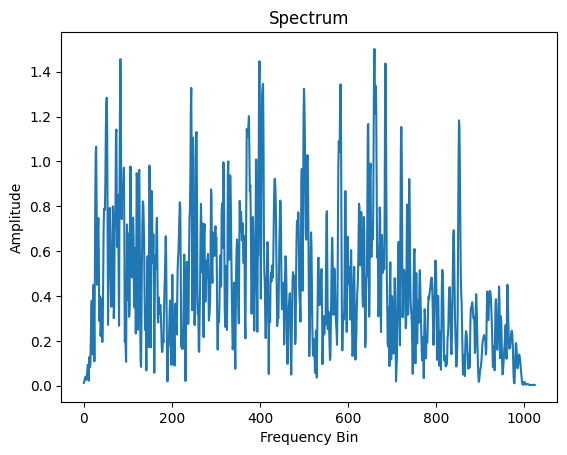

In [22]:
csoa.get_graph_spectrum()